# 회귀모델의 오류(Regression error metrics)

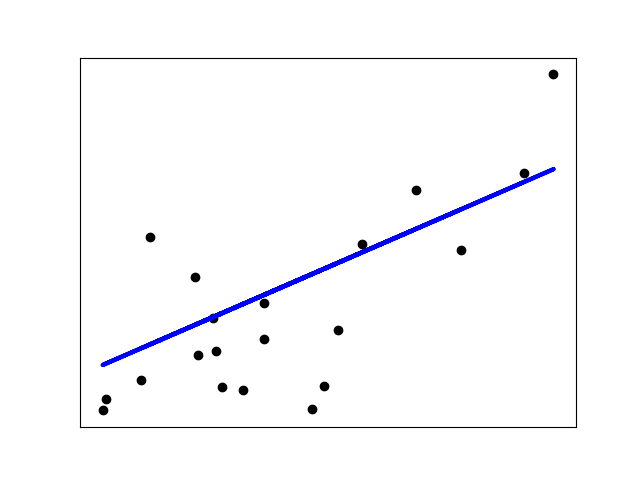

### 선형회귀 모델에서 오류를 측정하는 방법으로 아래 4가지를 예시를 통해 살펴보겠습니다.

>- Mean Absolute Error
>- Mean Absolute Percentage Error
>- Mean Square Error
>- Mean Percentage Error

## 1. 데이터 정의
>- 본 예제에서 사용될 데이터는 캐글(Kaggle)의 비디오 게임 판매 임


In [1]:
import pandas as pd
df = pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv').dropna().reset_index()
df.tail()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6820,16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.0,0.0,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
6821,16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.0,0.0,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
6822,16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.0,0.0,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
6823,16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.0,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
6824,16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.0,0.0,0.01,60.0,12.0,7.2,13.0,SimBin,E10+



## 이 데이터 세트에는 판매량이 100,000 개 이상인 비디오 게임 목록이 포함되어 있음

>- 필드에는 다음이 포함됩니다.
>- 순위-전체 판매 순위
>- 이름-게임 이름
>- 플랫폼-게임 출시 플랫폼 (예 : PC, PS4 등)
>- 연도-게임 출시 연도
>- Genre-게임 장르
>- Publisher-게임 게시자
>- NA_Sales-북미 판매 (백만 달러 단위)
>- EU_Sales-유럽 판매 (백만 달러 단위)
>- JP_Sales-일본 내 판매 (백만 달러 단위)
>- Other_Sales-나머지 국가에서의 판매 (백만 달러 단위)
>- Global_Sales-전 세계 총 매출입니다.

## 우선 전체의 데이터중에 Critic_Score, User_Score, Global_Sales열만 사용하도록 하겠습니다.

In [2]:
X = df[['Critic_Score','User_Score']].astype('float32')
# X = [tuple(x) for x in subset.values]
# X = list(subset.itertuples(index=False))
sales = df['Global_Sales'].astype('float32')
# y= list(sales.iteritems())
# y = [tuple(x) for x in sales.values]
# print(X.shape, sales.shape)

## 데이터 시각화
>- 시각화를 통해 데이터의 모양을 확인해 보겠습니다.

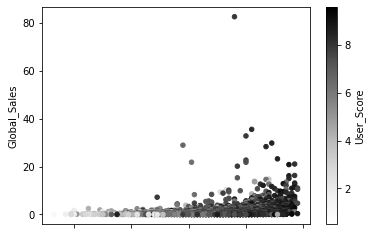

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

t_df = df[['Critic_Score','User_Score','Global_Sales']].astype('float')
t_df.plot.scatter(x='Critic_Score', y='Global_Sales', c='User_Score')

### x축은 평론가 점수이고 y축은 비디오 게임의 판매량입니다. 
### 그리고 유저들의 평가는 색상으로 표현했습니다. 
### 점수가 높을 수록 판매량이 높은 분명한 선형 관계가 보이네요. 
### 그리고 몇개의 특이값(outliners) 보입니다.

## 선형회귀
>- 이제 sklearn을 이용해 간단히 선형회귀 모델을 만들고 모델로 판매량을 예측해보겠습니다.

In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)
lm.fit(X, sales)
y_true = sales.values  # 실제
y_pred = lm.predict(X)

### 생성한 선형회귀 모델을 평가하는 지표들을 차례로 살펴보죠. 각각의 지표는 특성을 이해하고 상황에 맞게 사용해야 합니다.

## Mean Absolute Error (MAE)

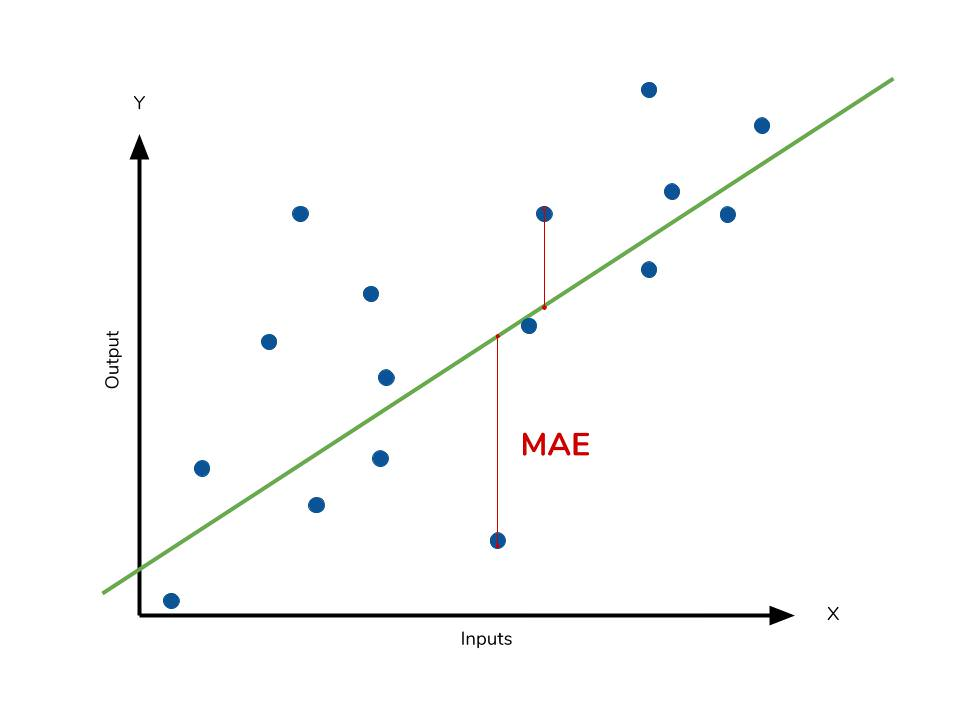

### MAE(평균절대오차)는 다음과 같이 정의됩니다.

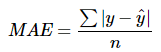

모델의 예측값과 실제값의 차이를 모두 더한다는 개념입니다.

절대값을 취하기 때문에 가장 직관적으로 알 수 있는 지표입니다.

MSE 보다 특이치에 robust(강력)합니다.

절대값을 취하기 때문에 모델이 underperformance 인지 overperformance 인지 알 수 없습니다.

underperformance: 모델이 실제보다 낮은 값으로 예측

overperformance: 모델이 실제보다 높은 값으로 예측

In [7]:
import numpy as np

def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

MAE(y_true, y_pred)

0.7699795

### MAE는 sklearn.metrics에서 지원합니다.

In [8]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

0.7699795

### 우리 모델의 MAE는 0.760이며, 우리의 데이터 판매 범위는 0.01에서 83이기 때문에 상당히 괜찮은 값입니다.

## Mean Squared Error(MSE)¶

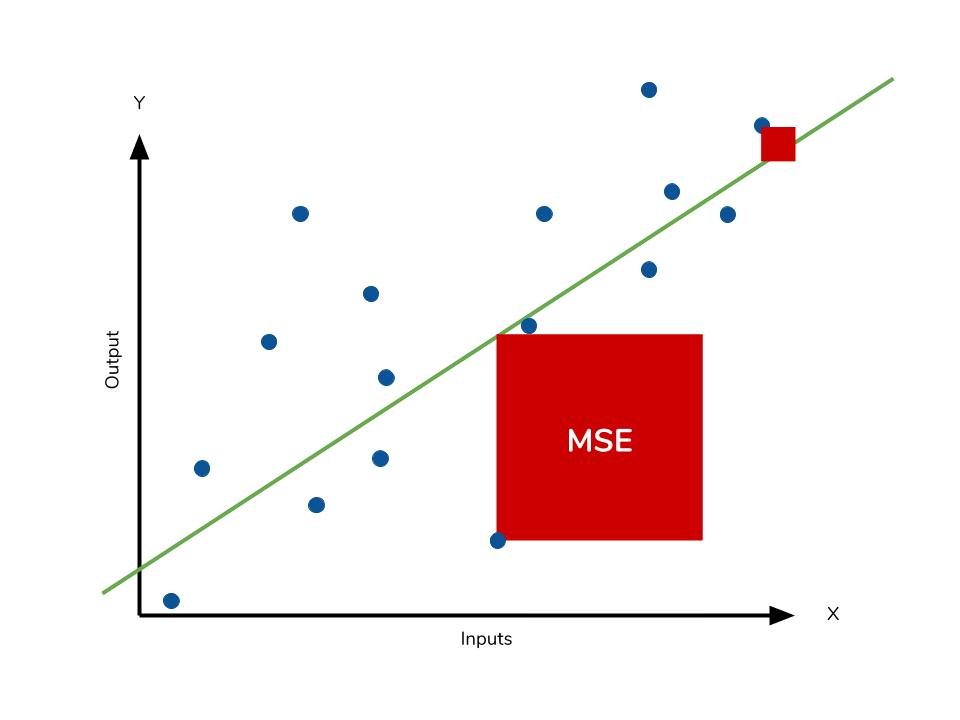

### MSE는 다음과 같이 정의됩니다.

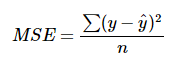

제곱을 하기 때문에 MAE와는 다르게 모델의 예측값과 실제값 차이의 면적의 합입니다.

이런 차이로, 특이값이 존재하면 수치가 많이 늘어납니다.

특이치에 민감하다

In [9]:
def MSE(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred)))

MSE(y_true, y_pred)

3.6227748

MSE 또한 sklearn.metrics로 간단히 사용할 수 있습니다.

In [10]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

3.6227748

## Root Mean Squared Error(RMSE)

RMSE는 MSE에 루트를 씌워 다음과 같이 정의합니다.

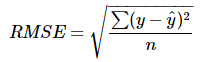

RMSE를 사용하면 오류 지표를 실제 값과 유사한 단위로 다시 변환하여 해석을 쉽게 합니다.

In [11]:
np.sqrt(MSE(y_true, y_pred))

1.9033588

-

## Mean Absolute Percentage Error(MAPE)

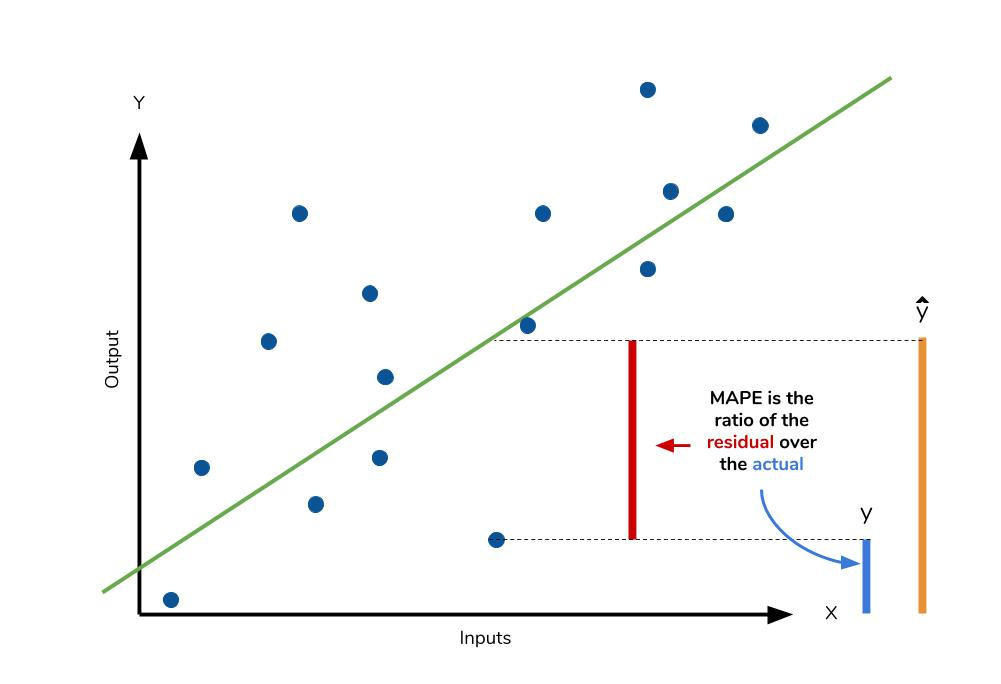
MAPE는 실제 대비 잔차의 비율입니다.

MAPE는 MAE를 퍼센트로 변환한 것입니다.

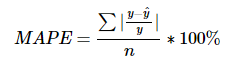

MAE와 마찬가지로 MSE보다 특이치에 robust(강함)합니다.

MAE와 같은 단점을 가집니다.

추가적으로 모델에 대한 편향이 존재합니다.

이 단점에 대응하기 위해 MPE도 추가로 확인하는게 좋습니다.

0 근처의 값에서는 사용하기 어렵습니다.

In [12]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE(y_true, y_pred)

558.8788509368896

-

## Mean Percentage Error(MPE)

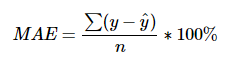

MAPE에서 절대값을 제외한 지표입니다. 아래와 같이 정의합니다.

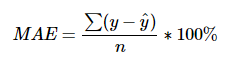

MPE의 가장 큰 장점은

모델이 underperformance 인지 overperformance 인지 판단 할 수 있다는 것입니다.

In [13]:
def MPE(y_true, y_pred): 
    return np.mean((y_true - y_pred) / y_true) * 100
MPE(y_true, y_pred)

-468.2328701019287

음수의 값임으로, 모델이 overperformance임을 알 수있습니다.

-

-

## 마치며,

테이블로 간단하게 정리해보겠습니다.

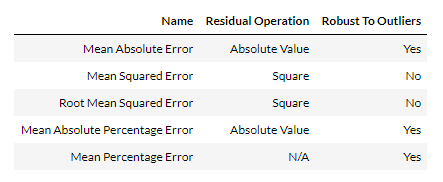

회귀문제에서 RMSE가 일반적으로 선호되는 방법이지만, 

상황에 맞는 다른 방식을 사용해야 합니다. 

특이값이 많은 경우에는 MAE를 사용하는게 좋죠.